In [1]:
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt

In [2]:
# Load the salary CSV file into a Pandas DataFrame
salary_csv_file = Path("data/salaries.csv")
salary_data_df = pd.read_csv(salary_csv_file)

# Display salary data
salary_data_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [3]:
# Load the tiles CSV file into a Pandas DataFrame
titles_csv_file = Path("data/titles.csv")
titles_data_df = pd.read_csv(titles_csv_file)

# Display salary data
titles_data_df.head()


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [4]:
# Load the employees CSV file into a Pandas DataFrame
employees_csv_file = Path("data/employees.csv")
employees_data_df = pd.read_csv(employees_csv_file)

# Display employees data
employees_data_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [5]:
# Load the employees dept CSV file into a Pandas DataFrame
dept_emp_csv_file = Path("data/dept_emp.csv")
dept_emp_data_df = pd.read_csv(dept_emp_csv_file)

# Display dept_emp data
dept_emp_data_df.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [6]:
# Load the dept CSV file into a Pandas DataFrame
dept_csv_file = Path("data/departments.csv")
dept_data_df = pd.read_csv(dept_csv_file)

# Display dept data
dept_data_df.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [7]:
# Load the dept Manager CSV file into a Pandas DataFrame
dept_mgr_csv_file = Path("data/dept_manager.csv")
dept_mgr_data_df = pd.read_csv(dept_mgr_csv_file)

# Display dept mgr data
dept_mgr_data_df.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


# List the employee number, last name, first name, sex, and salary of each employee.

In [8]:
emp_data = employees_data_df.merge(salary_data_df, on='emp_no')
emp_data = emp_data[["emp_no","last_name","first_name","sex","salary"]]
emp_data.head(10)

,emp_no,last_name,first_name,sex,salary
0,473302,Zallocco,Hideyuki,M,40000
1,475053,Delgrande,Byong,F,53422
2,57444,Babb,Berry,F,48973
3,421786,Verhoeff,Xiong,M,40000
4,282238,Baumann,Abdelkader,F,40000
5,263976,Cusworth,Eran,M,40000
6,273487,Parfitt,Christoph,M,56087
7,461591,Samarati,Xudong,M,40000
8,477657,Magliocco,Lihong,M,54816
9,219881,Speek,Kwangyoen,F,40000


In [9]:
emp_data = employees_data_df.merge(salary_data_df, on='emp_no')
titles_data_df.rename(columns={'title_id': 'emp_title_id'}, inplace=True)
sal_data = titles_data_df.merge(emp_data, on="emp_title_id" )

salary_info_df = sal_data[["title","salary"]]

avg_salary_df=salary_info_df.groupby('title').mean().sort_values(by='salary', ascending=False).reset_index()
avg_salary_df

,title,salary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447
5,Engineer,48535.336511
6,Senior Engineer,48506.799871


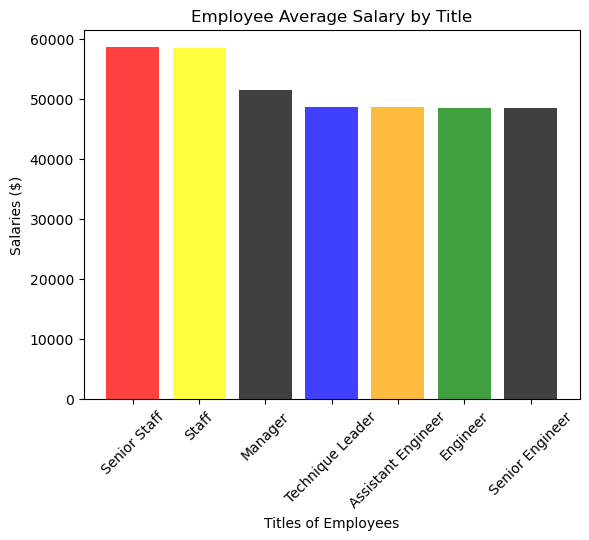

In [10]:
# Create Bar Chart for average salary by title
color=['red', 'yellow', 'black', 'blue', 'orange','green','black']

plt.bar(avg_salary_df['title'], avg_salary_df['salary'], align="center", alpha=0.75, color=color)

plt.xticks(avg_salary_df['title'], rotation=45)

plt.ylabel("Salaries ($)")
plt.xlabel("Titles of Employees")
plt.title("Employee Average Salary by Title")

# Save Figure
plt.savefig("emp_average_salary_by_title.png")

# Show plot
plt.show()

# List the first name, last name, and hire date for the employees who were hired in 1986.

In [11]:
warnings.filterwarnings('ignore')

# convert the hire date column to datetime type
employees_data_df['hire_date'] = pd.to_datetime(employees_data_df['hire_date'])

# create a boolean for  the rows with hire date in 1986
bool_1986 = employees_data_df['hire_date'].dt.year == 1986

emp_1986=  employees_data_df[bool_1986][['first_name', 'last_name', 'hire_date']].sort_values(by='hire_date', ascending=True).reset_index()

# filter the dataframe and select only the desired columns
emp_1986 = emp_1986[['first_name', 'last_name', 'hire_date']]


emp_1986.head()

,first_name,last_name,hire_date
0,Manibrata,Stiles,1986-01-01
1,Vidar,Tibblin,1986-01-01
2,Uri,Asmuth,1986-01-01
3,Jianhao,Serot,1986-01-01
4,Shahid,Baaz,1986-01-01


# List the manager of each department along with their department number, department name, employee number, last name, and first name.

In [12]:
#merge employee and dept manager dataframe  on emp no
emp_mgr = employees_data_df.merge(dept_mgr_data_df, on='emp_no')
#merge employee, dept and dept manager dataframe  on dept no
dept_mgr = emp_mgr.merge(dept_data_df, on="dept_no")

dept_mgr_df= dept_mgr.sort_values(by='dept_no', ascending=True).reset_index()

#Filter department number, department name, employee number, last name, and first name under the dept
dept_mgr_df = dept_mgr[["emp_no","dept_no","dept_name","last_name","first_name"]]

dept_mgr_df

,emp_no,dept_no,dept_name,last_name,first_name
0,111877,d009,Customer Service,Spinelli,Xiaobin
1,111939,d009,Customer Service,Weedman,Yuchang
2,111692,d009,Customer Service,Butterworth,Tonny
3,111784,d009,Customer Service,Giarratana,Marjo
4,111534,d008,Research,Kambil,Hilary
5,111400,d008,Research,Staelin,Arie
6,110765,d006,Quality Management,Hofmeyr,Rutger
7,110725,d006,Quality Management,Onuegbe,Peternela
8,110854,d006,Quality Management,Pesch,Dung
9,110800,d006,Quality Management,Quadeer,Sanjoy


# List the department number for each employee along with that employee’s employee number, last name, first name, and department name.

In [13]:
dept_emp = employees_data_df.merge(dept_emp_data_df, on='emp_no')

dept_df =dept_emp.merge(dept_data_df, on="dept_no")

dept_df= dept_df.sort_values(by='dept_no', ascending=True).reset_index()

dept_df = dept_df[["dept_no","emp_no","last_name","first_name","dept_name"]]

dept_df.head()

,dept_no,emp_no,last_name,first_name,dept_name
0,d001,417966,Msuda,Tristan,Marketing
1,d001,51806,Tasistro,Fumitake,Marketing
2,d001,93296,Montresor,Baoqiu,Marketing
3,d001,415631,Baumann,Rimli,Marketing
4,d001,268497,Vecchi,Xiping,Marketing


# List the first name, last name, and sex of each employee whose first name is Hercules and whose last name begins with the letter B.

In [14]:
emp_first_name = employees_data_df[employees_data_df['first_name'] == 'Hercules']

emp_last_name = emp_first_name['last_name'].str.startswith('B')

filtered_emp=  emp_first_name[emp_last_name][['first_name', 'last_name', 'sex']].sort_values(by='sex', ascending=True).reset_index()

filtered_emp = filtered_emp[['first_name', 'last_name', 'sex']]

filtered_emp

,first_name,last_name,sex
0,Hercules,Bernardinello,F
1,Hercules,Biron,F
2,Hercules,Birge,F
3,Hercules,Berstel,F
4,Hercules,Bail,F
5,Hercules,Brendel,F
6,Hercules,Benantar,F
7,Hercules,Bain,F
8,Hercules,Biran,F
9,Hercules,Bisiani,F


# List each employee in the Sales department, including their employee number, last name, and first name.

In [15]:

sales_dept_df = dept_data_df[dept_data_df['dept_name']=="Sales"]

dept_emp_df = employees_data_df.merge(dept_emp_data_df, on="emp_no")

filtered_sales_emp = dept_emp_df.merge(sales_dept_df,on="dept_no")

filtered_sales_emp= filtered_sales_emp.sort_values(by='emp_no', ascending=True).reset_index()

filtered_sales_emp = filtered_sales_emp[["emp_no","last_name","first_name","dept_name"]]

filtered_sales_emp.head()

,emp_no,last_name,first_name,dept_name
0,10002,Simmel,Bezalel,Sales
1,10016,Cappelletti,Kazuhito,Sales
2,10034,Swan,Bader,Sales
3,10041,Lenart,Uri,Sales
4,10050,Dredge,Yinghua,Sales


# List each employee in the Sales and Development departments, including their employee number, last name, first name, and department name.

In [16]:
sales_dev_df = dept_data_df[(dept_data_df.dept_name == 'Development') | (dept_data_df.dept_name == 'Sales')]

dept_emp_df = employees_data_df.merge(dept_emp_data_df, on="emp_no")

filtered_sales_dev_emp = dept_emp_df.merge(sales_dev_df,on="dept_no")

filtered_sales_dev_emp= filtered_sales_dev_emp.sort_values(by='dept_name', ascending=True).reset_index()

filtered_sales_dev_emp = filtered_sales_dev_emp[["emp_no","last_name","first_name","dept_name"]]

filtered_sales_dev_emp.head()

,emp_no,last_name,first_name,dept_name
0,208153,Lunn,Abdulah,Development
1,477850,Bressoud,Georg,Development
2,261094,Randi,Gretta,Development
3,27808,Maliniak,Xiaoqiu,Development
4,34051,Motley,Jordanka,Development


# List the frequency counts, in descending order, of all the employee last names (that is, how many employees share each last name).

In [17]:
emp_counts =  pd.DataFrame(employees_data_df['last_name'].value_counts(sort=True, ascending=False))

emp_counts.rename(columns={'count': 'frequency_counts'}, inplace=True)

emp_counts.head(20)

,frequency_counts
last_name,
Baba,226
Coorg,223
Gelosh,223
Sudbeck,222
Farris,222
Adachi,221
Osgood,220
Mandell,218
Masada,218
